<img src="http://drive.google.com/uc?export=view&id=1JzM1Jig5KAOCvU4tIf2t66B3gd1uy1rG" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

<font color="blue">
    
## Table of Contents
- ### Apache Cassandra 
- ### Introduction
- ### Features of Cassandra
- ### Cassandra Architecture Features
- ### Creating Keyspace in AstraDB
- ### Creating Database in AstraDB
- ### Connecting to database cluster using Python driver
- ### Creating tables and performing CRUD operations

</font>

### <font color="blue">Apache Cassandra </font>

Apache Cassandra is a free and open-source, distributed, wide column store, NoSQL database management system.  
It is designed to handle large amounts of data across many commodity servers, providing high availability with no single point of failure.  
It offers robust support for clusters spanning multiple datacenters, with asynchronous masterless replication allowing low latency operations for all clients.

### <font color="blue">Introduction</font>

- First developed by Facebook for Inbox Search.  
- It's a free, open source NoSQL distributed database.  
- It is used to create database which is spread across multiple servers instead of single one which allows the database to grow significantly.  
- It is highly scalable and highly available without hindering the overall performance.  
- Its being used by some of the tech giants including Facebook, Netflix, Twitter for serving use cases such as messaging, gaming, fraud detection, location based services, etc.  

### <font color="blue">Features of Cassandra</font>

- **Hybrid:** Masterless architecture of cassandra in which read and write can be done on any node.  
Low latency guarantees to withstand an entire data center outage without any data loss.  

- **Fault tolerant:** Replication of data on multiple nodes guarantees no single point of failure which in turn can survive regional outages and the failed nodes can be replaced with healthy ones with zero downtime.  

- **Focus on quality :** Cassandra is tested on large clusters with more than 1000 nodes and with large number of use cases which ensures stability and reliability.  
 
- **Performant :** It consistently outperforms other NoSQL alternatives which makes it a highly reliable NoSQL Service.  

- **Full control:** Flexibility of choice between asynchronous and synchronous replication for node updates.  

- **Data protection :** Data protection is designed using commit log design and in built security is always provided for employing backup and restore mechanisms.  

- **Cassandra Query language :** It provides CQL as query language which is very much similar to SQL Language. Helps with easy transition for developers while switching from RDBMS to Cassandra.  

- **Elastic :** Streams data between nodes during scaling operations such as adding new node or datacenter during peak traffic times. It is zero copy streaming process which makes it upto 5x faster without using any virtual nodes.  

### <font color="blue">Cassandra Architecture Features</font>

- Non master-slave architecture  
- All nodes are considered same and these are arranged in ring type architecture  
- Data is replicated across all nodes  
- Data persists in memory and written to disk in lazy fashion  
- Data distribution among nodes takes places using a consistent hashing technique  
- Each node is assigned a token value  
- Number of replicas is configurable to achieve the required redundancy  
- Supports multiple datacenters so that data can be replicated in the other datacenters to avoid single point of failure

Lets study an example where we will be creating two tables in a database and perform some operations

### <font color="blue">Creating Keyspace in AstraDB</font>

**Step - 1**,  Create a keyspace named 'city_user_info' in AstraDB

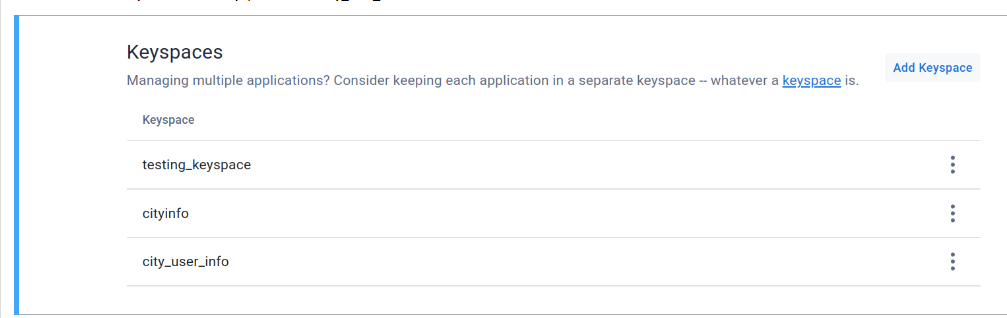

We click on **Add Keyspace** to create a new keyspace. In this we will add **cityicity_user_info** as a new keyspace.

### <font color="blue">Creating Database in AstraDB</font>

**Step - 2**, Create a database named **city_user_database** in the keyspace **city_user_info**

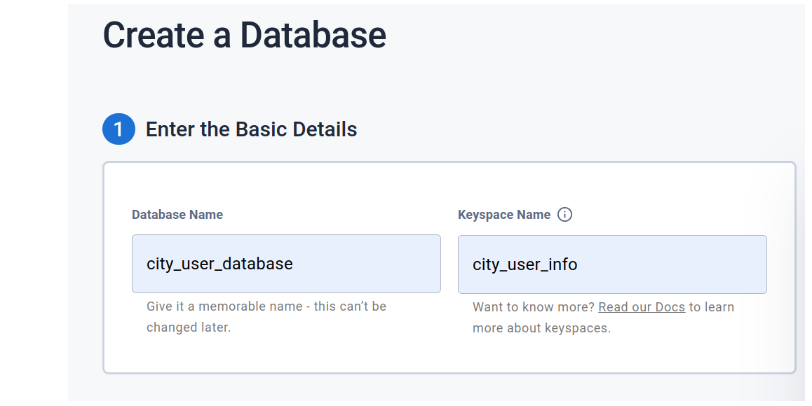

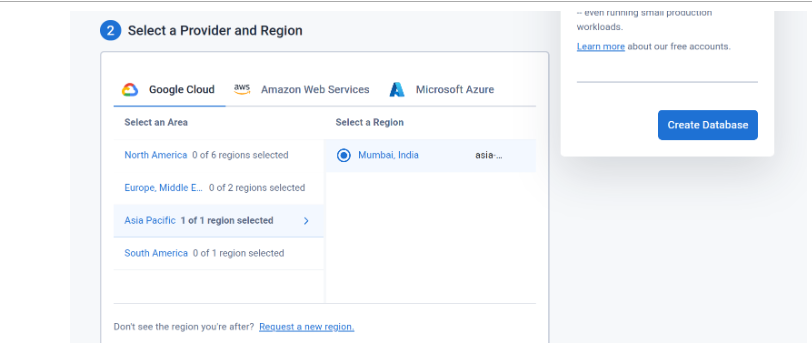

Once the database is created, it is available in the dashboard

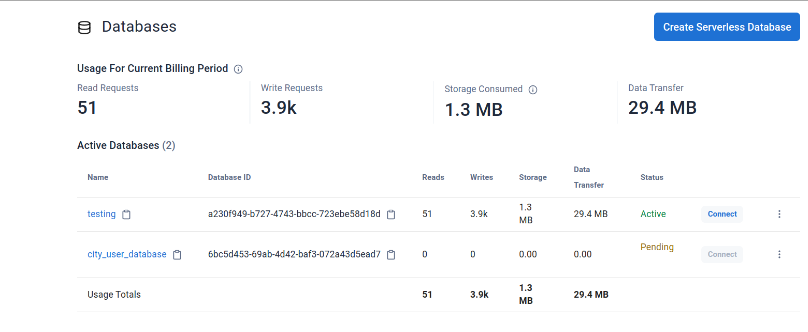

We wait till AstraDB brings the created database to an **active** state.

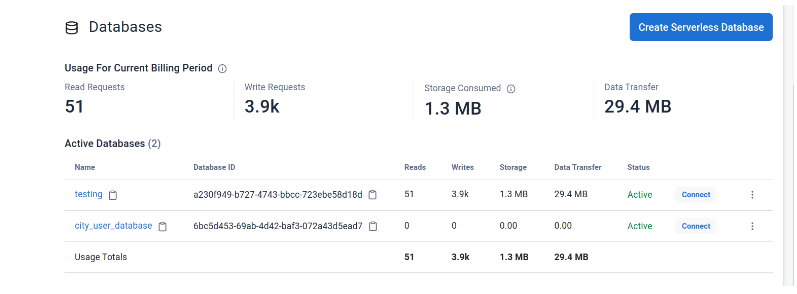

### <font color="blue">Connecting to database cluster using Python driver</font>

**Step - 3**, Connect with this Cassandra database using Python

In order to connect with Cassandra, we need ***python-cassandra-driver***.  
For this we will create a virtual environment and install the ***python-cassandra-driver*** in this virtual environment.  
Command to create a virtual environment is   
```
python -m venv <path>
# <path> - is the folder where you wish to create the virtual environment.
```
Alternatively, you can create a new project using PyCharm. This too will create a a virtual environment ```venv``` under the folder where you are creating a new project.  
Command to install Cassandra driver is ```pip install cassandra-driver```

To connect with Cassandra service, we need the following three things...  
* Secure connect bundle.  
* Client ID  
* Secret key


You have to download a secure bundle. Following is a reference for the same

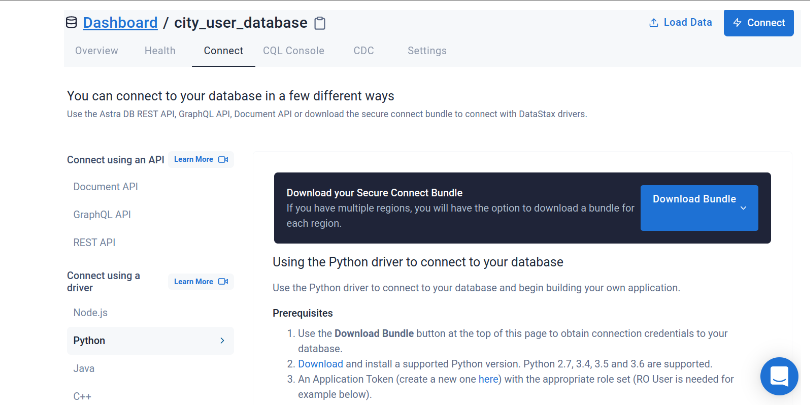![image.png](attachment:image.png)

Create a **client ID** and **secret key** using the point no **3** in the prerequisites section of the dashboard.

This will route us to a page for creating an application token for connection prupose. 

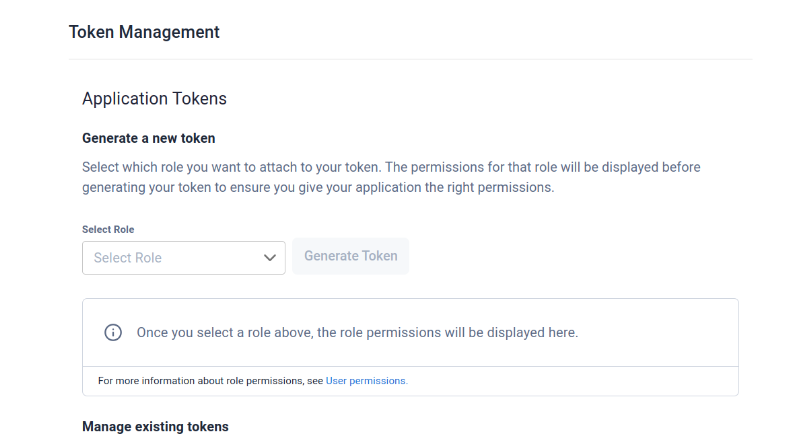

Select the relevant role from the provided dropdown.

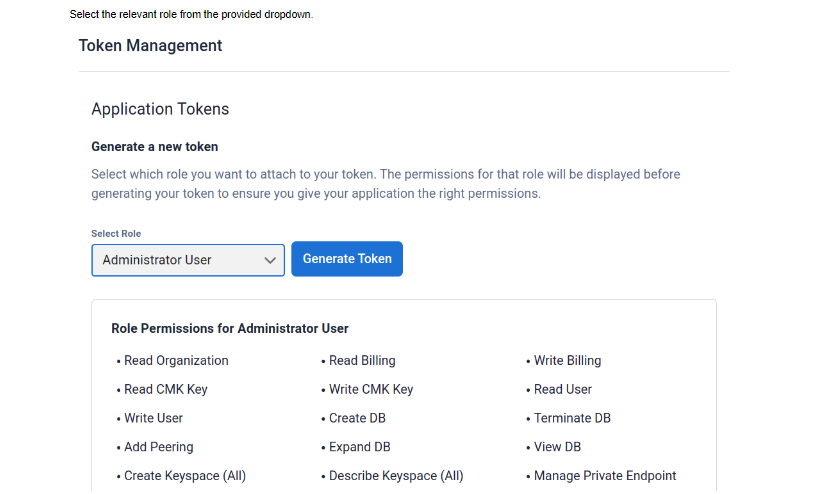

Now click on **Generate Token** for creating the credentials which will be used for connection purpose.

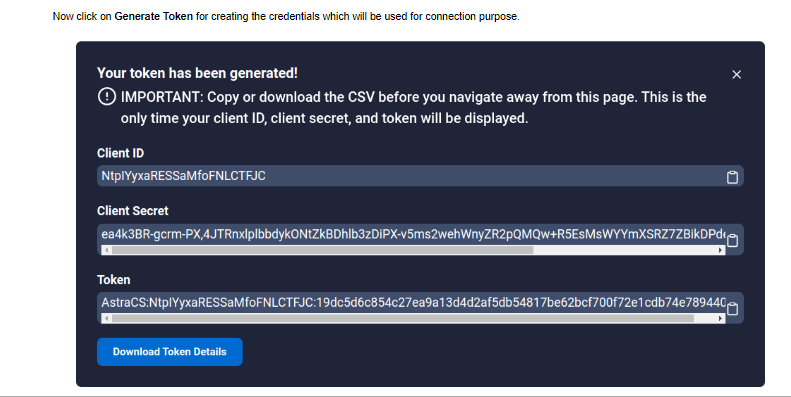

We need this **Client ID** and **Client Secret** for the connection purpose.

Now we write the code to connect with Cassandra database.

In [ ]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

In [ ]:
#AstraDB Client and Secret required for the connection
ASTRA_CLIENT_ID = 'cfsrhoGFjydKMzxZqmdHMUsc'
ASTRA_SECRET = 'U3tK_OZ.9,+aI_98xfnjQ5wP.0gTZt100+SAmN8_Rg+t_Lpv0ZoEkz9jel9yKJCETUMsPuC-hJu5izhbiCniA3vb+XJ.Fo7Xr1C-Zss6I_3Ynwham1Gpg_oqulXzUCaf'

#Cloud Configuration
#Cloud Configuration
cloud_config= {
        'secure_connect_bundle': 'secure-connect-city-user-database.zip'
}

#Authentication Provider
auth_provider = PlainTextAuthProvider(ASTRA_CLIENT_ID, ASTRA_SECRET)

#Cluster Object as per auth provider and cloud configuration
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

Here we are using **Client ID** and **Client Secret** and **secure-connect-city-user-database.zip** to create an object of a Cluster which will connect to Cassandra cluster we have created earlier. 

In [ ]:
#Session object
session = cluster.connect()

#Checking is session object is initialised
if session is not None:
    print("Session initialised successfully.")
else:
    print("Session is not initialised.")

Here we are creating a **session object** to perform all the operations.

In [ ]:
KEYSPACE = 'city_user_info'

#Setting Keyspace in the cassandra session
session.execute(f'USE {KEYSPACE}')

### <font color="blue">Creating tables and performing CRUD operations</font>

Now we create two table **users** and **cities** to store user and city details respectively.

In [ ]:
#Creating table 'users'
create_users_table_query = f"""CREATE TABLE IF NOT EXISTS users (
 username text,
 name text,
 age int,
 PRIMARY KEY(username)
);"""

table_creation_result = session.execute(create_users_table_query)

print(table_creation_result)

In [ ]:
#Creating table 'cities'
create_cities_table_query = f"""CREATE TABLE IF NOT EXISTS cities (
 id int,
 name text,
 country text,
 PRIMARY KEY(id)
);"""

table_creation_result = session.execute(create_cities_table_query)

print(table_creation_result)

### <font color="blue">CRUD Operations</font>

**C**reating new records (Inserting data) in the newly created **users** and **cities** table

In [ ]:
#Data for Users table
users_data = [
    ['anglie123', 'Anglie', 24],
    ['brookes234', 'Brookes', 38],
    ['steven456', 'Steven', 28]
]

#Data for Cities table
cities_data = [
    [1, 'Delhi', 'India'],
    [2, 'Dubai', 'UAE'],
    [3, 'Berlin', 'Germany']
]

#Insert query in the form of prepared statement for cities table
insert_query_cities = '''INSERT INTO cities(id,name,country) VALUES (%s,'%s','%s');'''

#Insert query in the form of prepared statement for users table
insert_query_users = '''INSERT INTO users(username,name,age) VALUES ('%s','%s',%s);'''

#Executing insert query for 
for user in users_data:
    print(user[0])
    print(user[1])
    print(user[2])
    
    session.execute(insert_query_users % (user[0], user[1], user[2]))
    
for city in cities_data:
    print(city[0])
    print(city[1])
    print(city[2])
    
    session.execute(insert_query_cities % (city[0], city[1], city[2]))

**R**eading data from the tables

In [ ]:
rows = session.execute("select * from cities;")
for row in rows:
    print(row.id, row.name, row.country)
    
rows = session.execute("select * from users;")
for row in rows:
    print(row.username, row.name, row.age)

Fetching token values of the each rows of both the tables.

In [ ]:
#Token value of the primary key in 'users' table
rows = session.execute("select token(username) from users;")
for row in rows:
    print(row.system_token_username)

#Token value of the primary key in 'cities' table
rows = session.execute("select token(id) from cities;")
for row in rows:
    print(row.system_token_id) 

Applying filters using **WHERE** clause 

In [ ]:
#Filtering based on the partition key (primary key)
rows = session.execute("select * from cities where id = %s;" % (1))
for row in rows:
    print(row)

Now here the filtering is done based on the primary key column which is also called as partition key.

In [ ]:
#Filtering based onthe non partition key 
rows = session.execute("select * from cities where name = '%s';" % ('Delhi'))
for row in rows:
    print(row)

Now when we try to filter the data based on the non primary key column (non partition key) then it will raise an error as below.

**Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"**

Since no partition has been mentioned, Cassandra is **hunting** the required name in all nodes.  
Imagine, if there are 10 or 100 notes, it will take time to return data. And not suggested.  
In case, you wish to find something w.r.t. a field, then either create another table (recommended option) or create a secondary index (though not recommended)

Now lets perform **update** and **delete** operations on the created tables.

**U**pdate data

In [ ]:
#Updating age of anglie123 username user in users table
session.execute("UPDATE users SET age = 26 where username = 'anglie123'")

#Checking for the last update activity on users table
rows = session.execute("SELECT * FROM users where username = 'anglie123'")
for row in rows:
    print(row)

**D**elete data

In [ ]:
#Deleting row with id as 3 in cities table
session.execute("DELETE FROM cities where id = 3")

#Checking the above deleteing operation
rows = session.execute("select * from cities;")
for row in rows:
    print(row.id, row.name, row.country)